In [3]:
from functools import partial
from openfermion.ops.operators.ising_operator import IsingOperator
from openfermion.ops.operators.qubit_operator import QubitOperator
from zquantum.qaoa.ansatzes.farhi_ansatz import QAOAFarhiAnsatz
from zquantum.qaoa.estimators import CvarEstimator
from zquantum.optimizers.scipy_optimizer import ScipyOptimizer
from zquantum.core.estimation import (
    estimate_expectation_values_by_averaging,
    allocate_shots_uniformly,
    calculate_exact_expectation_values,
)
from zquantum.core.cost_function import AnsatzBasedCostFunction
from qequlacs.simulator import QulacsSimulator
from zquantum.core.openfermion import change_operator_type
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import numpy as np
from qequlacs.simulator import QulacsSimulator
from zquantum.core.estimation import calculate_exact_expectation_values
from zquantum.core.cost_function import AnsatzBasedCostFunction
from zquantum.core.graph import load_graph, generate_graph_from_specs
from zquantum.core.interfaces.optimizer import optimization_result
from zquantum.optimizers.scipy_optimizer import ScipyOptimizer
from zquantum.qaoa.ansatzes.farhi_ansatz import QAOAFarhiAnsatz
from zquantum.qaoa.problems.maxcut import get_maxcut_hamiltonian
from zquantum.qaoa.problems.stable_set import get_stable_set_hamiltonian
from qequlacs import QulacsSimulator
import time
import os

/home/abarthe/.local/lib/python3.8/site-packages/qiskit/optimization/__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')


In [28]:
import networkx as nx

# Graph 1

In [44]:
# graph = nx.random_regular_graph(3,8)
graph = nx.gnm_random_graph(6,10)

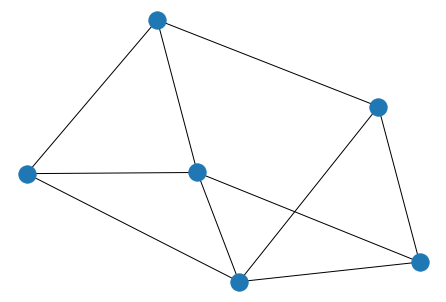

In [45]:
nx.draw(graph)

In [46]:
cost_hamiltonian = get_maxcut_hamiltonian(graph)

In [47]:
number_of_layers = 2

ansatz = QAOAFarhiAnsatz(number_of_layers, cost_hamiltonian=cost_hamiltonian)
backend = QulacsSimulator()

# TODO: load initial parameters from data
initial_params = np.random.uniform(-np.pi, np.pi, ansatz.number_of_params)

estimation_method = calculate_exact_expectation_values

cost_function = AnsatzBasedCostFunction(cost_hamiltonian, ansatz, backend, estimation_method)

In [48]:
cost_function

Optimal cost function value: -5.686022042352105


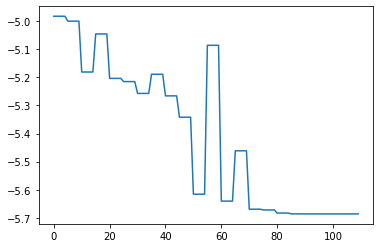

In [49]:
optimizer = ScipyOptimizer(method="L-BFGS-B")
opt_results = optimizer.minimize(cost_function, initial_params, keep_history=True)
print("Optimal cost function value:", opt_results.opt_value)

values_history = [entry.value for entry in opt_results.history]

plt.plot(values_history)
plt.show()

In [51]:
opt_results.opt_params

array([-2.09847819, -0.83587752, -0.64583343, -4.82977699])

# Graph 2

In [56]:
# graph = nx.random_regular_graph(3,8)
graph = nx.gnm_random_graph(6,10)

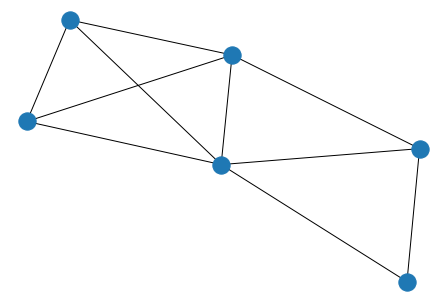

In [57]:
nx.draw(graph)

In [58]:
cost_hamiltonian = get_maxcut_hamiltonian(graph)

In [59]:
number_of_layers = 2

ansatz = QAOAFarhiAnsatz(number_of_layers, cost_hamiltonian=cost_hamiltonian)
backend = QulacsSimulator()

# TODO: load initial parameters from data
initial_params = np.random.uniform(-np.pi, np.pi, ansatz.number_of_params)

estimation_method = calculate_exact_expectation_values

cost_function = AnsatzBasedCostFunction(cost_hamiltonian, ansatz, backend, estimation_method)

Optimal cost function value: -6.237177675570443


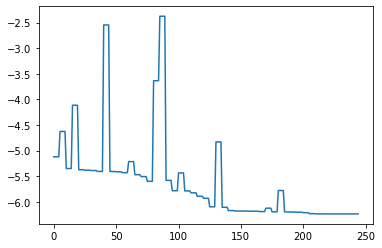

In [60]:
optimizer = ScipyOptimizer(method="L-BFGS-B")
opt_results = optimizer.minimize(cost_function, initial_params, keep_history=True)
print("Optimal cost function value:", opt_results.opt_value)

values_history = [entry.value for entry in opt_results.history]

plt.plot(values_history)
plt.show()

In [61]:
opt_results.opt_params

array([ 2.68446522,  1.81250026, -3.40808348,  2.67630924])

# Old

Optimal cost function value: -0.9999999999993775


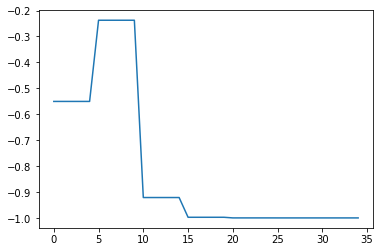

In [4]:

# TODO: load from data of interest
cost_hamiltonian = QubitOperator("[Z0]")
cost_hamiltonian = change_operator_type(cost_hamiltonian, IsingOperator)
number_of_layers = 2

ansatz = QAOAFarhiAnsatz(number_of_layers, cost_hamiltonian=cost_hamiltonian)
backend = QulacsSimulator()

# TODO: load initial parameters from data
initial_params = np.random.uniform(-np.pi, np.pi, ansatz.number_of_params)

# TODO: select method of choice
estimation_method = calculate_exact_expectation_values
# estimation_method = estimate_expectation_values_by_averaging
# estimation_method = CvarEstimator(alpha=0.3)

estimation_preprocessors = []
# TODO: this is optional, if we need sampling for our calculations,
# calculate_exact_expectation_values does not require it.
# shot_allocation = partial(allocate_shots_uniformly, number_of_shots=10000)
# estimation_preprocessors = [shot_allocation]

# TODO: select optimizer of choice
# from zquantum.optimizers.basin_hopping import BasinHoppingOptimizer
# optimizer = BasinHoppingOptimizer()
# from zquantum.optimizers.cma_es_optimizer import CMAESOptimizer
# optimizer = CMAESOptimizer(sigma_0=0.8)
optimizer = ScipyOptimizer(method="L-BFGS-B")

cost_function = AnsatzBasedCostFunction(
    cost_hamiltonian, ansatz, backend, estimation_method, estimation_preprocessors
)

# When
opt_results = optimizer.minimize(cost_function, initial_params, keep_history=True)
print("Optimal cost function value:", opt_results.opt_value)

values_history = [entry.value for entry in opt_results.history]

plt.plot(values_history)
plt.show()


In [11]:
cost_hamiltonian

1.0 [Z0]